# Statistics, Prediction, and Maximum Likelihood

The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [1]:
# Import all the necessary packages: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Part 1

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

In [2]:
def exponentialNegLogLikelihood(lamb, y):
    neg_log_lik = -np.sum(np.log(lamb) - lamb * y)
    return neg_log_lik

In [3]:
# Test the function
lamb = 2
y = np.array([1, 4, 6, 0])
print("Test 1: ", exponentialNegLogLikelihood(lamb, y))

Test 1:  19.227411277760222


In [4]:
# What happens when you call the function with lamb=np.array([1,0.5,2,5]) and y=np.array([1.5,2.1,3.4,0])?
lamb = np.array([1, 0.5, 2, 5])
y = np.array([1.5, 2.1, 3.4, 0])
print("Test 2: ", exponentialNegLogLikelihood(lamb, y))

Test 2:  7.740562087565899


In [5]:
# What happens when you set an element of lamb to 0?
lamb = 0
print("Test 3: ", exponentialNegLogLikelihood(lamb, y))

Test 3:  inf


/var/folders/7l/hzhbdmks3snf1lxq26d5wcbh0000gn/T/ipykernel_3607/4263834597.py:2: RuntimeWarning: divide by zero encountered in log
  neg_log_lik = -np.sum(np.log(lamb) - lamb * y)


In [6]:
# What happens when you set an element of lamb to a negative number?
lamb = -1
print("Test 3: ", exponentialNegLogLikelihood(lamb, y))

Test 3:  nan


/var/folders/7l/hzhbdmks3snf1lxq26d5wcbh0000gn/T/ipykernel_3607/4263834597.py:2: RuntimeWarning: invalid value encountered in log
  neg_log_lik = -np.sum(np.log(lamb) - lamb * y)


- The function computes an exponential negative log likelihood value as they take lambda and y which are vectors. It performs computation over arrays that have the same size with elements at every corresponding position getting computed.

- When lambda is 0, the function returns inf. The closer you get to zero, the larger the negative number is, which means that ln(0) is negative infinity. Since we are using negative log likelihood function, negative infinity becomes infinity. When lambda is negative, the function returns NaN. The natural logarithm function ln(x) is defined only for x>0. Therefore, the natural logarithm of a negative number is undefined.

- When the element of lamb is set to 0, then the result is `inf` since $$\lim_{x \rightarrow 0^+}\ln(x)=-\infty.$$ If lamb is a negative number, the result is nan which means not a number and this is because the logarithm is not defined for a negative number. 

### Part 2

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

In [7]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    lamb = np.exp(-X@b)
    neg_log_lik = exponentialNegLogLikelihood(lamb, y)
    return neg_log_lik

In [8]:
# Test your function 
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
print("Test: ", exponentialRegressionNegLogLikelihood(b, X, y))

Test:  26.60556862451103


a) In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?.
- When we minimize the appropriate likelihood function, it may occur RunTimeWarning since lambda could be zero or negative.
- If $\lambda$ has the form of $\mathbf{X}\beta$, we cannot guarantee that $\lambda$ always has positive values. If $\lambda$ is zero or negative, then log of $\lambda$ will be undefined as required for the `exponentialNegLogLikelihood`function.


b) What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$?: 
- Exponential distribution's support is the set of positive real numbers, so lambda cannot be zero or negative.
- When $\exp(-\mathbf{X}\beta)$ is used, we guarantee that the parameter $\lambda$ of the exponential distribution is positive.

### Part 3

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

In [9]:
# Definition of the Prediction
def Prediction(b, X):
    yhat = np.exp(X@b)
    return yhat

In [10]:
# Test the function
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
print("Test:", Prediction(b,X))

Test: [ 2980.95798704 66171.16016838  1808.04241446]


### Part 4

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

In [11]:
# Define Model_fit
def Model_fit(X, y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    nrows, ncols = X.shape
    beta_start = np.zeros((ncols,1))
    
    # Minimize the appropriate likelihood function
    mle = minimize(exponentialRegressionNegLogLikelihood, beta_start, args=(X,y), method="powell")
    
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

In [12]:
# Show the code to find estimated b
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
print(f"The estimated b is {Model_fit(X, y)}")

The estimated b is [ 1.17119176 -0.72067184]


### Part 5

Use the data `exponential_regression.csv` to fit a exponential regression using the functions that you already have created. In this data, $y$ is measured in time units. 

In [16]:
# Loading in the data.
df = pd.read_csv("exponential_regression.csv", sep=';')

In [17]:
df.head()

,x,y
0,0.260360,0.755994
1,-0.346457,0.391628
2,0.900106,0.306394
3,0.299767,0.775901
4,0.435408,0.303732


In [18]:
# Create the design matrix
x = df.x.values
X = np.c_[np.ones(x.shape[0]), x]
y = df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = Model_fit(X, y)
print("Estimated coefficients:", betas)

Estimated coefficients: [ 0.07120564 -1.75117875]


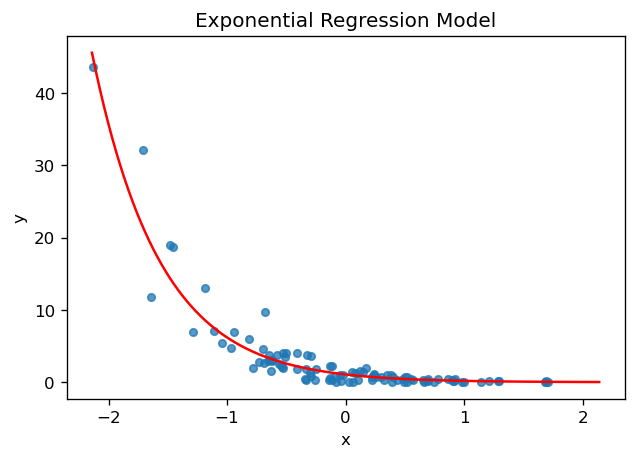

In [19]:
# Scatterplot the data. 
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x='x', y='y', alpha=0.75, ax=ax)

# Create the new data to graphic the prediction
newx = np.linspace(-2.14, 2.14, 1001)
newX = np.c_[np.ones(newx.size), newx]

# Predictions on the new data
y_predicted = Prediction(betas, newX)

# Finally, plot the predictions on the same graph
plt.title('Exponential Regression Model')
ax.plot(newx, y_predicted, color = 'red')

Figure 1. Exponential Regression Model

### Part 6

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range.


The estimated coefficients using linear regression are [ 0.         -5.11409159]


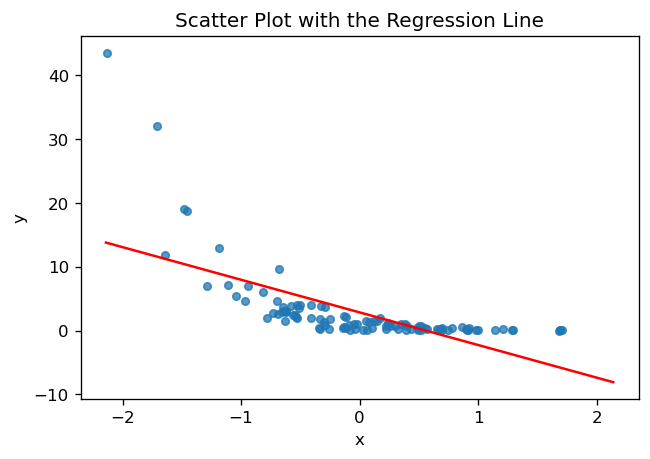

In [20]:
# Fit the linear regression model
ols_fit = LinearRegression().fit(X, y)

# Obtain parameter estimates
betas_r = ols_fit.coef_ 
print(f'The estimated coefficients using linear regression are {betas_r}')

# Make predictions on the new data
y_predicted = ols_fit.predict(newX)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x='x', y='y', alpha=0.75, ax = ax)
plt.title('Scatter Plot with the Regression Line')
ax.plot(newx, y_predicted, color = 'red')

Figure 2. Linear Regression Model

Between this two models, I would select the exponential regression model as we can see that the linear regression model does not fit well. The linear regression model underestimates the values of $y$ for $x \in [-2.14, -1.5] \cup [1, 2.14]$. There are many data fay away from the linear regression line. There are some points that y becomes negative, and it does not make sense in time units. This problem does not occur with the exponential regression model.